In [30]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
experiments = [e.split('/')[-1] for e in sorted(glob.glob('../data/output/predictions/test/*'))]
predictions = {}
for exp in experiments:
    paths = sorted(glob.glob(f'../data/output/predictions/test/{exp}/*.npy'))
    if len(paths) != 5:
        continue
    predictions[exp] = np.mean([np.load(path) for path in paths], axis=0).flatten()

In [32]:
kernel_paths = glob.glob('../data/output/predictions/kernel/*.csv')
for path in kernel_paths:
    exp = path.split('/')[-1]
    pred = pd.read_csv(path)['target'].values
    predictions[exp] = pred
predictions = pd.DataFrame(predictions)

In [33]:
predictions.corr()

,default,trainer=exp001,trainer=exp002,submission5.csv
default,1.000000,0.986121,0.985951,0.974127
trainer=exp001,0.986121,1.000000,0.992898,0.968315
trainer=exp002,0.985951,0.992898,1.000000,0.972170
submission5.csv,0.974127,0.968315,0.972170,1.000000


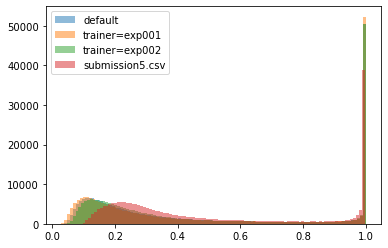

In [34]:
for key, preds in predictions.items():
    plt.hist(preds, bins=100, alpha=0.5, label=key)
plt.legend();

In [35]:
rank_predictions = {}
for key, preds in predictions.items():
    rank_predictions[key] = preds.rank() / len(preds)
rank_predictions = pd.DataFrame(rank_predictions)

In [36]:
preds = 0.7 * (0.3 * rank_predictions['default'] + 0.3 * rank_predictions['trainer=exp001'] + 0.4 * rank_predictions['trainer=exp002'])  + 0.3 * rank_predictions['submission5.csv']

In [37]:
sub = pd.read_csv('../data/input/sample_submission.csv')
sub['target'] = preds
sub.to_csv('../data/output/submission/ensebmle.csv', index=None)
sub.head()

,id,target
0,00005bced6,0.929743
1,0000806717,0.754999
2,0000ef4fe1,0.518671
3,00020de251,0.738720
4,00024887b5,0.065424


In [38]:
# !kaggle competitions submit g2net-gravitational-wave-detection -f ../data/output/submission/ensebmle.csv -m ""

100%|██████████████████████████████████████| 6.51M/6.51M [00:03<00:00, 1.93MB/s]
Successfully submitted to G2Net Gravitational Wave Detection